In [1]:
import pandas as pd
import numpy as np

import pandas_profiling

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Opening dataset
play_by_play = pd.read_csv('resources/play_by_play_analysis.csv')
play_by_play.head()

,game_id,home_team,away_team,side_of_field,yardline_100,qtr,down,goal_to_go,ydstogo,play_type,posteam_timeouts_remaining,defteam_timeouts_remaining,posteam_score,defteam_score,score_differential
0,2009091000,PIT,TEN,TEN,30.0,1,NaN,0.0,0,kickoff,3.0,3.0,NaN,NaN,NaN
1,2009091000,PIT,TEN,PIT,58.0,1,1.0,0.0,10,pass,3.0,3.0,0.0,0.0,0.0
2,2009091000,PIT,TEN,PIT,53.0,1,2.0,0.0,5,run,3.0,3.0,0.0,0.0,0.0
3,2009091000,PIT,TEN,PIT,56.0,1,3.0,0.0,8,pass,3.0,3.0,0.0,0.0,0.0
4,2009091000,PIT,TEN,PIT,56.0,1,4.0,0.0,8,punt,3.0,3.0,0.0,0.0,0.0


In [3]:
play_by_play.isna().sum()

game_id                           0
home_team                         0
away_team                         0
side_of_field                   600
yardline_100                  13070
qtr                               0
down                          67962
goal_to_go                    12707
ydstogo                           0
play_type                     12874
posteam_timeouts_remaining    12879
defteam_timeouts_remaining    12879
posteam_score                 15419
defteam_score                 15419
score_differential            15419
dtype: int64

In [4]:
# Removing row with NaN values
all_play_types = play_by_play[play_by_play.play_type.notna()]

In [5]:
all_play_types.isna().sum()

game_id                           0
home_team                         0
away_team                         0
side_of_field                   368
yardline_100                    368
qtr                               0
down                          55563
goal_to_go                        5
ydstogo                           0
play_type                         0
posteam_timeouts_remaining        5
defteam_timeouts_remaining        5
posteam_score                  2545
defteam_score                  2545
score_differential             2545
dtype: int64

In [6]:
# Filling in missing values with 0
complete_pbp_data = all_play_types.fillna(0)
complete_pbp_data.isna().sum()

game_id                       0
home_team                     0
away_team                     0
side_of_field                 0
yardline_100                  0
qtr                           0
down                          0
goal_to_go                    0
ydstogo                       0
play_type                     0
posteam_timeouts_remaining    0
defteam_timeouts_remaining    0
posteam_score                 0
defteam_score                 0
score_differential            0
dtype: int64

In [7]:
# Creating a new column for next_play taking the values of play_type and shifting up by 1
# IMPORTANT: RUN ONLY ONCE!
complete_pbp_data['next_play'] = complete_pbp_data.play_type.shift(-1)

In [8]:
# Because we shifted the row up by 1, the last play of a game is now the first play of the previous.
# Since there is not play after the last one of a game, we can remove the last row of each game, which will now be populated by 'kickoff' from the previous game
# We can also remove the last row
# We can also remove kickoffs (down=0)
final_table = complete_pbp_data[(complete_pbp_data.next_play != 'kickoff') & (complete_pbp_data.down != 0.0) & (complete_pbp_data.down != 4.0)]
final_table.drop(final_table.tail(1).index, inplace=True)

/anaconda3/envs/nflData/lib/python3.7/site-packages/pandas/core/frame.py:4102: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [9]:
# We can also remove the last row
final_table.head()

,game_id,home_team,away_team,side_of_field,yardline_100,qtr,down,goal_to_go,ydstogo,play_type,posteam_timeouts_remaining,defteam_timeouts_remaining,posteam_score,defteam_score,score_differential,next_play
1,2009091000,PIT,TEN,PIT,58.0,1,1.0,0.0,10,pass,3.0,3.0,0.0,0.0,0.0,run
2,2009091000,PIT,TEN,PIT,53.0,1,2.0,0.0,5,run,3.0,3.0,0.0,0.0,0.0,pass
3,2009091000,PIT,TEN,PIT,56.0,1,3.0,0.0,8,pass,3.0,3.0,0.0,0.0,0.0,punt
5,2009091000,PIT,TEN,TEN,98.0,1,1.0,0.0,10,run,3.0,3.0,0.0,0.0,0.0,pass
6,2009091000,PIT,TEN,TEN,98.0,1,2.0,0.0,10,pass,3.0,3.0,0.0,0.0,0.0,run


In [10]:
final_table.next_play.unique()

array(['run', 'pass', 'punt', 'field_goal', 'no_play', 'extra_point',
       'qb_kneel', 'qb_spike'], dtype=object)

In [11]:
# Also removing 'no_play', 'extra_point','qb_kneel', 'qb_spike' classes
only_productive_plays = final_table[(final_table.next_play == 'pass') | 
                                    (final_table.next_play == 'run')]
only_productive_plays.head()

,game_id,home_team,away_team,side_of_field,yardline_100,qtr,down,goal_to_go,ydstogo,play_type,posteam_timeouts_remaining,defteam_timeouts_remaining,posteam_score,defteam_score,score_differential,next_play
1,2009091000,PIT,TEN,PIT,58.0,1,1.0,0.0,10,pass,3.0,3.0,0.0,0.0,0.0,run
2,2009091000,PIT,TEN,PIT,53.0,1,2.0,0.0,5,run,3.0,3.0,0.0,0.0,0.0,pass
5,2009091000,PIT,TEN,TEN,98.0,1,1.0,0.0,10,run,3.0,3.0,0.0,0.0,0.0,pass
6,2009091000,PIT,TEN,TEN,98.0,1,2.0,0.0,10,pass,3.0,3.0,0.0,0.0,0.0,run
9,2009091000,PIT,TEN,TEN,43.0,1,1.0,0.0,10,pass,3.0,3.0,0.0,0.0,0.0,pass


In [12]:
only_productive_plays.next_play.unique()

array(['run', 'pass'], dtype=object)

In [13]:
only_productive_plays.head()

,game_id,home_team,away_team,side_of_field,yardline_100,qtr,down,goal_to_go,ydstogo,play_type,posteam_timeouts_remaining,defteam_timeouts_remaining,posteam_score,defteam_score,score_differential,next_play
1,2009091000,PIT,TEN,PIT,58.0,1,1.0,0.0,10,pass,3.0,3.0,0.0,0.0,0.0,run
2,2009091000,PIT,TEN,PIT,53.0,1,2.0,0.0,5,run,3.0,3.0,0.0,0.0,0.0,pass
5,2009091000,PIT,TEN,TEN,98.0,1,1.0,0.0,10,run,3.0,3.0,0.0,0.0,0.0,pass
6,2009091000,PIT,TEN,TEN,98.0,1,2.0,0.0,10,pass,3.0,3.0,0.0,0.0,0.0,run
9,2009091000,PIT,TEN,TEN,43.0,1,1.0,0.0,10,pass,3.0,3.0,0.0,0.0,0.0,pass


In [14]:
only_productive_plays.isna().sum()

game_id                       0
home_team                     0
away_team                     0
side_of_field                 0
yardline_100                  0
qtr                           0
down                          0
goal_to_go                    0
ydstogo                       0
play_type                     0
posteam_timeouts_remaining    0
defteam_timeouts_remaining    0
posteam_score                 0
defteam_score                 0
score_differential            0
next_play                     0
dtype: int64

# Predicting next play

### Data Pre-processing

In [15]:
# Selecting features data
X = only_productive_plays.drop(columns=['game_id','home_team', 'away_team', 'goal_to_go','side_of_field', 'play_type', 'next_play', 'posteam_score', 'defteam_score'], axis=0)
X.head()

,yardline_100,qtr,down,ydstogo,posteam_timeouts_remaining,defteam_timeouts_remaining,score_differential
1,58.0,1,1.0,10,3.0,3.0,0.0
2,53.0,1,2.0,5,3.0,3.0,0.0
5,98.0,1,1.0,10,3.0,3.0,0.0
6,98.0,1,2.0,10,3.0,3.0,0.0
9,43.0,1,1.0,10,3.0,3.0,0.0


In [16]:
# Selecting outcome
y = only_productive_plays.next_play
y.head()

1     run
2    pass
5    pass
6     run
9    pass
Name: next_play, dtype: object

In [17]:
y.unique()

array(['run', 'pass'], dtype=object)

In [18]:
print(X.shape, y.shape)

(255102, 7) (255102,)


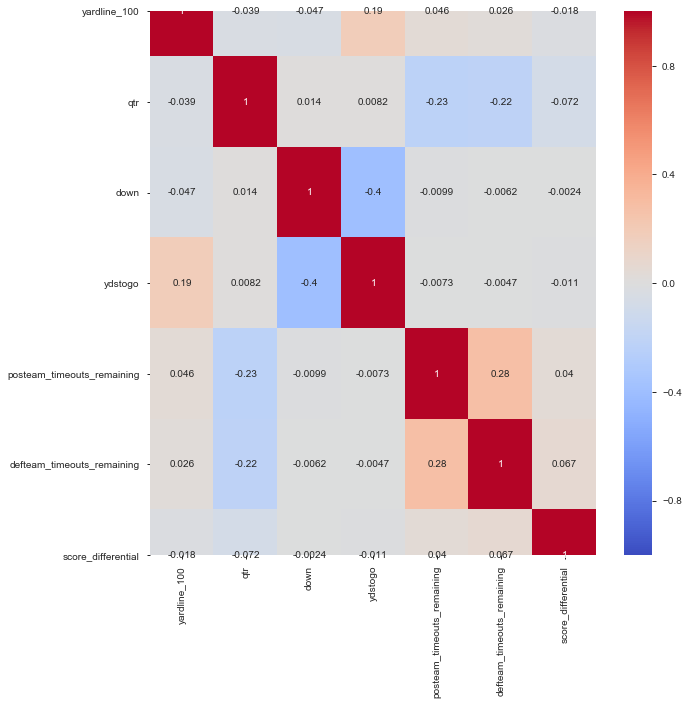

In [19]:
# Correlation between features
plt.figure(figsize=(10,10))
sns.heatmap(X.corr(),
            vmin=-1,
            cmap='coolwarm',
            annot=True);

## Logistic Regression Model

In [20]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from tensorflow.keras.utils import to_categorical

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, stratify=y)

In [22]:
# Scaling features
X_scaler = MinMaxScaler().fit(X_train)
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [23]:
# Step 1: Label-encode data set
label_encoder = LabelEncoder()

label_encoder.fit(y_train)
encoded_y_train = label_encoder.transform(y_train)
encoded_y_test = label_encoder.transform(y_test)

In [24]:
encoded_y_train

array([0, 0, 0, ..., 1, 0, 1])

In [25]:
# Creating a logistic regression model
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(multi_class='multinomial', solver ='newton-cg')
classifier

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='multinomial', n_jobs=None, penalty='l2',
                   random_state=None, solver='newton-cg', tol=0.0001, verbose=0,
                   warm_start=False)

In [26]:
classifier.fit(X_train_scaled, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='multinomial', n_jobs=None, penalty='l2',
                   random_state=None, solver='newton-cg', tol=0.0001, verbose=0,
                   warm_start=False)

In [27]:
print(f"Training Data Score: {classifier.score(X_train_scaled, y_train)}")
print(f"Testing Data Score: {classifier.score(X_test_scaled, y_test)}")

Training Data Score: 0.6074292046036608
Testing Data Score: 0.6074855745107878


In [28]:
predictions = classifier.predict(X_test)
predictions_LR = pd.DataFrame({"Prediction": predictions, "Actual": y_test})
predictions_LR.head()

,Prediction,Actual
177840,pass,run
82537,pass,run
219697,pass,pass
23601,pass,run
390939,pass,run


In [29]:
hypothetical_case = X.loc[[1]]

In [38]:
hypothetical_case.ydstogo = hypothetical_case.score_differential = -20
hypothetical_case.head()

,yardline_100,qtr,down,ydstogo,posteam_timeouts_remaining,defteam_timeouts_remaining,score_differential
1,58.0,1,1.0,-20,3.0,3.0,-20


In [39]:
hypothetical_prediction = classifier.predict(hypothetical_case)
hypothetical_prediction

array(['pass'], dtype=object)

In [32]:
coefficients = classifier.coef_
coefficients_array = coefficients[0]
coefficients_array

array([ 0.01667113, -0.03380099, -0.2498796 , -1.21812486,  0.31278691,
        0.06430276,  1.61937117])

In [33]:
# Calculating odds ratio
odds_ratio = np.exp(coefficients_array)
odds_ratio

array([1.01681087, 0.96676388, 0.77889455, 0.29578428, 1.36723016,
       1.06641522, 5.04991379])

In [34]:
X.columns

Index(['yardline_100', 'qtr', 'down', 'ydstogo', 'posteam_timeouts_remaining',
       'defteam_timeouts_remaining', 'score_differential'],
      dtype='object')

In [35]:
odds_ratio_df = pd.DataFrame({"yardline_100": [odds_ratio[0]], 
                           "qtr": [odds_ratio[1]], 
                           "down": [odds_ratio[2]], 
                           "ydstogo": [odds_ratio[3]], 
                           "posteam_timeouts_remaining": [odds_ratio[4]], 
                           "defteam_timeouts_remaining": [odds_ratio[5]], 
                           "score_differential": [odds_ratio[6]]})
odds_ratio_df.head()

,yardline_100,qtr,down,ydstogo,posteam_timeouts_remaining,defteam_timeouts_remaining,score_differential
0,1.016811,0.966764,0.778895,0.295784,1.36723,1.066415,5.049914


In [36]:
x = np.arange(len(odds_ratio_df.columns))
y_pos = odds_ratio_df.values

Text(0, 0.5, 'Odds Ratio')

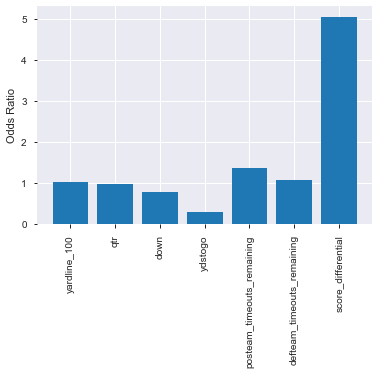

In [37]:
plt.bar(np.arange(len(odds_ratio)), odds_ratio)
plt.xticks(np.arange(7), ('yardline_100', 'qtr', 'down', 'ydstogo', 'posteam_timeouts_remaining', 'defteam_timeouts_remaining', 'score_differential'), rotation=90)
plt.ylabel('Odds Ratio')

## Deep Learning Model

In [28]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [29]:
# Create model and add layers
model = Sequential()
model.add(Dense(units=100, activation='relu', input_dim=10))
model.add(Dense(units=100, activation='relu'))
model.add(Dense(units=3, activation='softmax'))

In [30]:
# Compile and fit the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [31]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 100)               1100      
_________________________________________________________________
dense_1 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_2 (Dense)              (None, 3)                 303       
Total params: 11,503
Trainable params: 11,503
Non-trainable params: 0
_________________________________________________________________


In [32]:
print(X_train_scaled.shape)
print(encoded_y_train.shape)

(246859, 10)
(246859,)


In [33]:
X_train_scaled

array([[0.84848485, 0.25      , 0.5       , ..., 0.        , 0.04918033,
        0.47457627],
       [0.80808081, 0.25      , 0.5       , ..., 0.1147541 , 0.2295082 ,
        0.44067797],
       [0.35353535, 0.75      , 0.        , ..., 0.59016393, 0.37704918,
        0.61016949],
       ...,
       [0.64646465, 0.        , 0.5       , ..., 0.1147541 , 0.        ,
        0.55932203],
       [0.70707071, 0.25      , 0.25      , ..., 0.04918033, 0.32786885,
        0.3559322 ],
       [0.75757576, 0.25      , 0.25      , ..., 0.1147541 , 0.1147541 ,
        0.5       ]])

In [34]:
encoded_y_train

array([1, 1, 2, ..., 1, 1, 2])

In [35]:
model.fit(
    X_train_scaled,
    encoded_y_train,
    epochs=60,
    shuffle=True,
    verbose=2
)

Train on 246859 samples
Epoch 1/60
246859/246859 - 9s - loss: 0.6927 - accuracy: 0.6007
Epoch 2/60
246859/246859 - 8s - loss: 0.6709 - accuracy: 0.6139
Epoch 3/60
246859/246859 - 8s - loss: 0.6673 - accuracy: 0.6173
Epoch 4/60
246859/246859 - 8s - loss: 0.6658 - accuracy: 0.6177
Epoch 5/60
246859/246859 - 8s - loss: 0.6647 - accuracy: 0.6199
Epoch 6/60
246859/246859 - 8s - loss: 0.6637 - accuracy: 0.6200
Epoch 7/60
246859/246859 - 8s - loss: 0.6631 - accuracy: 0.6209
Epoch 8/60
246859/246859 - 8s - loss: 0.6623 - accuracy: 0.6219
Epoch 9/60
246859/246859 - 8s - loss: 0.6619 - accuracy: 0.6218
Epoch 10/60
246859/246859 - 9s - loss: 0.6613 - accuracy: 0.6222
Epoch 11/60
246859/246859 - 8s - loss: 0.6610 - accuracy: 0.6233
Epoch 12/60
246859/246859 - 8s - loss: 0.6608 - accuracy: 0.6239
Epoch 13/60
246859/246859 - 8s - loss: 0.6604 - accuracy: 0.6234
Epoch 14/60
246859/246859 - 8s - loss: 0.6602 - accuracy: 0.6240
Epoch 15/60
246859/246859 - 8s - loss: 0.6598 - accuracy: 0.6242
Epoch 16/6

In [37]:
model_loss, model_accuracy = model.evaluate(
    X_test_scaled, encoded_y_test, verbose=2)
print(
    f"Normal Neural Network - Loss: {model_loss}, Accuracy: {model_accuracy}")

82287/1 - 1s - loss: 0.5883 - accuracy: 0.6234
Normal Neural Network - Loss: 0.6638459794562214, Accuracy: 0.6234155893325806
